<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# **Search Algorithms**
---


In [1]:
#@title **Identificação do Grupo**

#@markdown Integrantes do Grupo, nome completo em ordem alfabética (*informe \<RA\>,\<nome\>*)
Aluno1 = '10402412, Diego Oliveira Aluizio' #@param {type:"string"}
Aluno2 = '10396490, Jônatas Garcia de Oliveira' #@param {type:"string"}
Aluno3 = '10403046, Livia Alabarse dos Santos' #@param {type:"string"}
Aluno4 = '10403028, Marina Scabello Martin' #@param {type:"string"}
Aluno5 = '10265432, Pedro Henrique Araujo Farias' #@param {type:"string"}

# **Resumo**

A tarefa inicial do projeto foi a modelagem do grafo e sua visualização.
Para a modelagem, consideramos **12 das cidades mais populosas do estado de São Paulo**. Em seguida, foi implementado o algoritmo de **Breadth First Search** como busca não informada. Por fim, escolhemos o algoritmo **A Star Search** como algoritmo de busca informada e o implementamos.

# **Implementação**




> ## **1. Grafo das cidades (2,0)**

###**Definição do grafo e levantamento de dados**

Selecionamos **12 das cidades mais populosas do estado de São Paulo** como vértices do grafo. Para determinar as arestas que conectam os vértices, selecionamos as **três cidades mais próximas de cada cidade**. O custo das arestas é a **distância (em inteiros) entre as cidades, em km, considerando um trajeto de carro, segundo o Google Maps**.

Para representar o grafo, utilizamos a variável `tree` para armazenar os vértices das cidades, bem como uma lista com suas cidades vizinhas mais próximas, indicando as arestas a serem estabelecidas entre os vértices: `cidade: [vizinha01, vizinha02, vizinha03]`.

Vale notar que, como se trata de um grafo não direcionado, caso exista a aresta `(cidade01, cidade02)`, a aresta `(cidade02, cidade01)` será **omitida**.

Para atribuir as distâncias correspondentes a cada rota, ou seja, o custo das arestas, foi criado um dicionário `distance` com tuplas da seguinte forma: `(cidade_origem, cidade_destino): distância_em_km`.

In [2]:
tree = {
    'São Paulo': ['Guarulhos', 'Osasco', 'São Bernardo do Campo'],
    'Guarulhos': ['Osasco', 'São Bernardo do Campo'],
    'Campinas': ['Jundiaí', 'Sorocaba', 'Barueri'],
    'São Bernardo do Campo': ['Santo André'],
    'Santo André': ['São Paulo', 'Guarulhos'],
    'Osasco': ['Barueri'],
    'Sorocaba': ['Barueri', 'Osasco'],
    'Ribeirão Preto': ['Campinas', 'Jundiaí'],
    'São José dos Campos': ['Guarulhos', 'São Paulo'],
    'Santos': ['São Bernardo do Campo', 'Santo André', 'São Paulo'],
    'Barueri': ['São Paulo', 'Guarulhos'],
    'Jundiaí': ['Osasco', 'Barueri']
}

distances = {
    ('São Paulo', 'Guarulhos'): 21,
    ('São Paulo', 'Osasco'): 21,
    ('São Paulo', 'São Bernardo do Campo'): 22,
    ('Guarulhos', 'Osasco'): 35,
    ('Guarulhos', 'São Bernardo do Campo'): 36,
    ('Campinas', 'Jundiaí'): 40,
    ('Campinas', 'Sorocaba'): 88,
    ('Campinas', 'Barueri'): 92,
    ('São Bernardo do Campo', 'Santo André'): 9,
    ('Santo André', 'São Paulo'): 26,
    ('Santo André', 'Guarulhos'): 42,
    ('Osasco', 'Barueri'): 12,
    ('Sorocaba', 'Barueri'): 74,
    ('Sorocaba', 'Osasco'): 84,
    ('Ribeirão Preto', 'Campinas'): 224,
    ('Ribeirão Preto', 'Jundiaí'): 260,
    ('São José dos Campos', 'Guarulhos'): 76,
    ('São José dos Campos', 'São Paulo'): 91,
    ('Santos', 'São Bernardo do Campo'): 66,
    ('Santos', 'Santo André'): 74,
    ('Santos', 'São Paulo'): 81,
    ('Barueri', 'São Paulo'): 38,
    ('Barueri', 'Guarulhos'): 45,
    ('Jundiaí', 'Barueri'): 53,
    ('Jundiaí', 'Osasco'): 55
}

###**Criação do Grafo**

Para criação do Grafo utilizamos as estruturas definidas anteriormente.

Cada "chave" do dicionário possui uma sequência de itens "filhos", simbolizando as arestas do grafo, e as distâncias são adicionadas acessando a posição correspondente da aresta na estrutura de distância.

Um novo grafo `G` é gerado utilizando a chamada `nx.Graph()`. Iterando pelas estruturas `tree` e `distances`, adicionamos os vértices e arestas ao grafo `G`.

Em seguida, o grafo é desenhado utilizando as funções da biblioteca `networkx`.

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

def plottree(tree, distances):
  G = nx.Graph()

  for parent, children in tree.items():
      for child in children:
          G.add_edge(parent, child, weight=distances[(parent, child)])

  pos = nx.spring_layout(G)
  plt.figure(figsize=(10, 8))
  nx.draw(G, pos, with_labels=True, arrows=True, node_size=2000,
          node_color='lightblue', font_size=10, font_weight='bold')

  edge_labels = nx.get_edge_attributes(G, 'weight')
  nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

  plt.show()

> ## **1.1. Resultados (Testes)**

Após alguns testes para o grafo em questão, a visualização mais clara dos dados foi dada pelo layout **spring** (`nx.spring_layout`).

Note que o tamanho das arestas na visualização não é proporcional ao custo (distância) associado.

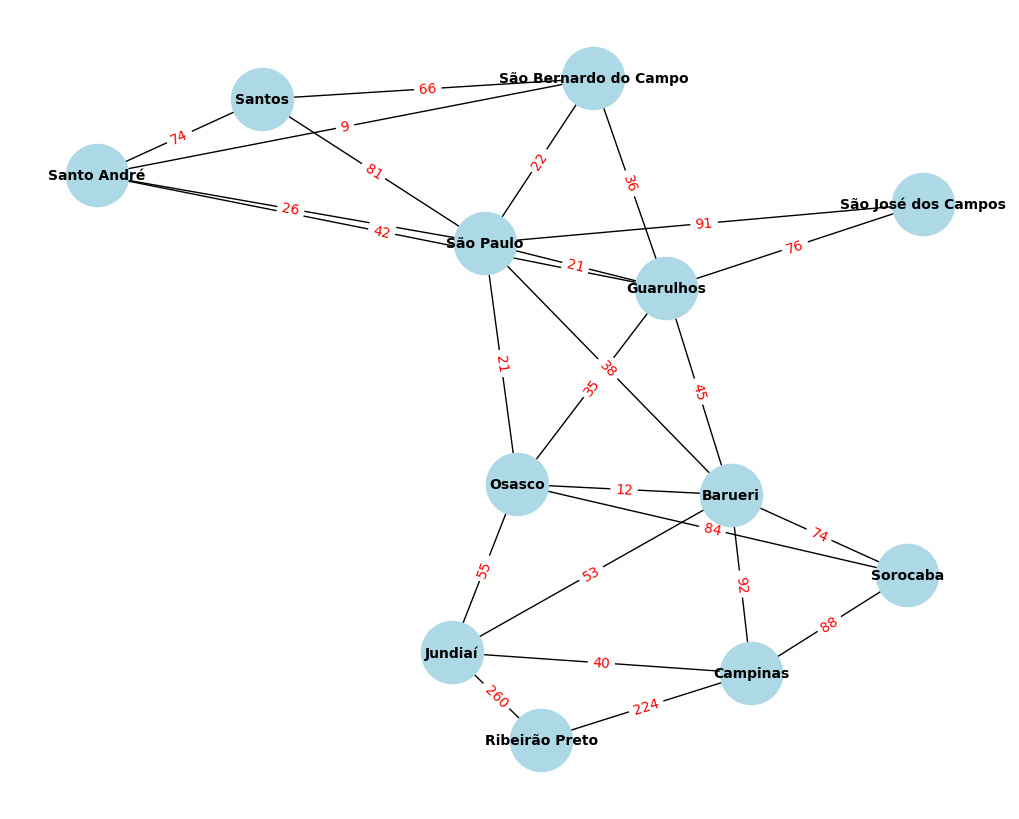

In [4]:
plottree(tree, distances)

> ## **2. BFS, Breadth-First Search (3,0)**

In [5]:
def make_undirected(tree):
    undirected_tree = {}

    for node, neighbors in tree.items():
        if node not in undirected_tree:
            undirected_tree[node] = set()
        for neighbor in neighbors:
            undirected_tree[node].add(neighbor)
            if neighbor not in undirected_tree:
                undirected_tree[neighbor] = set()
            undirected_tree[neighbor].add(node)

    return {node: list(neighbors) for node, neighbors in undirected_tree.items()}



O algoritmo de BFS foi construido usando como base o algortitmo de BFS providenciado no Colab de aula com algumas alterações chave. Inicialmente temos a função "make_undirected" que serve para transformar a representação do nosso grafo em uma mais legível pelo algoritmo do BFS



In [6]:
from collections import deque

def bfs(tree, start):
    tree = make_undirected(tree)
    visited = set()  # Conjunto para armazenar nós já visitados
    queue = deque([start])
    path = []  # Lista para armazenar o caminho percorrido

    while queue:
        node = queue.popleft()  # Remove da frente da fila
        if node not in visited:
            visited.add(node)  # Marca o nó como visitado
            path.append(node)  # Adiciona o nó ao caminho
            print(f"\nExplorando vizinhos de: {node}")  # Mostra de qual nó estamos buscando vizinhos

            for neighbor in tree[node]:  # Para cada vizinho do nó atual
                if neighbor not in visited and neighbor not in queue:  # Evita repetição
                    print(f"  Adicionando {neighbor} à fila")
                    queue.append(neighbor)

    print("\nCaminho percorrido pelo BFS:", path)

O BFS (Busca em Largura) percorre um grafo camada por camada visitando todos os vizinhos de um nó antes de avançar.

- O algoritmo inicia com um vértice, usa uma fila para armazenar os nós a serem explorados e um conjunto para marcar os visitados.
- Retira o primeiro nó da fila, marca como visitado e adiciona seus vizinhos ainda não explorados.
- Repete o processo até a fila esvaziar, garantindo que percorre todos os nós possíveis. Durante a execução, exibe qual nó está sendo processado e quais vizinhos foram adicionados.

> ## **2.1. Resultados (Testes)**

Primeiro teste com o vértice de início em São Paulo

In [7]:
bfs(tree, "São Paulo")


Explorando vizinhos de: São Paulo
  Adicionando Guarulhos à fila
  Adicionando Santos à fila
  Adicionando Osasco à fila
  Adicionando São José dos Campos à fila
  Adicionando Barueri à fila
  Adicionando Santo André à fila
  Adicionando São Bernardo do Campo à fila

Explorando vizinhos de: Guarulhos

Explorando vizinhos de: Santos

Explorando vizinhos de: Osasco
  Adicionando Jundiaí à fila
  Adicionando Sorocaba à fila

Explorando vizinhos de: São José dos Campos

Explorando vizinhos de: Barueri
  Adicionando Campinas à fila

Explorando vizinhos de: Santo André

Explorando vizinhos de: São Bernardo do Campo

Explorando vizinhos de: Jundiaí
  Adicionando Ribeirão Preto à fila

Explorando vizinhos de: Sorocaba

Explorando vizinhos de: Campinas

Explorando vizinhos de: Ribeirão Preto

Caminho percorrido pelo BFS: ['São Paulo', 'Guarulhos', 'Santos', 'Osasco', 'São José dos Campos', 'Barueri', 'Santo André', 'São Bernardo do Campo', 'Jundiaí', 'Sorocaba', 'Campinas', 'Ribeirão Preto']


Segundo teste com o vértice de início em Campinas



In [8]:
bfs(tree, "Campinas")


Explorando vizinhos de: Campinas
  Adicionando Ribeirão Preto à fila
  Adicionando Jundiaí à fila
  Adicionando Barueri à fila
  Adicionando Sorocaba à fila

Explorando vizinhos de: Ribeirão Preto

Explorando vizinhos de: Jundiaí
  Adicionando Osasco à fila

Explorando vizinhos de: Barueri
  Adicionando Guarulhos à fila
  Adicionando São Paulo à fila

Explorando vizinhos de: Sorocaba

Explorando vizinhos de: Osasco

Explorando vizinhos de: Guarulhos
  Adicionando São José dos Campos à fila
  Adicionando Santo André à fila
  Adicionando São Bernardo do Campo à fila

Explorando vizinhos de: São Paulo
  Adicionando Santos à fila

Explorando vizinhos de: São José dos Campos

Explorando vizinhos de: Santo André

Explorando vizinhos de: São Bernardo do Campo

Explorando vizinhos de: Santos

Caminho percorrido pelo BFS: ['Campinas', 'Ribeirão Preto', 'Jundiaí', 'Barueri', 'Sorocaba', 'Osasco', 'Guarulhos', 'São Paulo', 'São José dos Campos', 'Santo André', 'São Bernardo do Campo', 'Santos']


Terceiro teste com o vértice de início em Riberão Preto

In [9]:
bfs(tree, "Ribeirão Preto")


Explorando vizinhos de: Ribeirão Preto
  Adicionando Campinas à fila
  Adicionando Jundiaí à fila

Explorando vizinhos de: Campinas
  Adicionando Barueri à fila
  Adicionando Sorocaba à fila

Explorando vizinhos de: Jundiaí
  Adicionando Osasco à fila

Explorando vizinhos de: Barueri
  Adicionando Guarulhos à fila
  Adicionando São Paulo à fila

Explorando vizinhos de: Sorocaba

Explorando vizinhos de: Osasco

Explorando vizinhos de: Guarulhos
  Adicionando São José dos Campos à fila
  Adicionando Santo André à fila
  Adicionando São Bernardo do Campo à fila

Explorando vizinhos de: São Paulo
  Adicionando Santos à fila

Explorando vizinhos de: São José dos Campos

Explorando vizinhos de: Santo André

Explorando vizinhos de: São Bernardo do Campo

Explorando vizinhos de: Santos

Caminho percorrido pelo BFS: ['Ribeirão Preto', 'Campinas', 'Jundiaí', 'Barueri', 'Sorocaba', 'Osasco', 'Guarulhos', 'São Paulo', 'São José dos Campos', 'Santo André', 'São Bernardo do Campo', 'Santos']


> ## **3. Busca Informada (5,0)**

O algoritmo de busca informada estudado e implementado nesta atividade será o **algoritmo A***, ou A-Star.

Bem como outros algoritmos de busca informada, o A* tenta calcular o valor mínimo entre um ponto A e B. Para isso, faz uso de heurísticas.

### **Algoritmo A***
- A princípio, todos os nós recebem valor de distância infinito (g_score).
- O **cálculo de custo de um nó** é dado por `f_score = g_score + h_score`
  - **g_score** é a distância percorrida do nó inicial até o nó atual;
  - **h_score** é uma estimativa (heurística) da distância a ser percorrida até o destino final.
- A cada novo nó, o f_score dos nós adjacentes é calculado. Se o valor calculado for **menor** que o f_score atual do nó, esse valor será substituido, pois foi encontrado um caminho de menor distância até o nó adjacente.
- O algoritmo irá escolher o nó adjacente de **menor custo**, ou seja, **menor f_score**.
- Quando o algoritmo está percorrendo um caminho cujo valor do nó seja **igual** ao de um nó de um outro caminho, o algoritmo irá **escolher o nó com o menor h_score**.
- O processo é repetido até alcançar o destino final.

#### **Sobre Heurística**
Pode-se definir heurística como uma estimativa, uma abordagem que não garante sempre uma solução ótima, mas que apresenta uma aproximação boa o suficiente.

No algoritmo A-Star, é utilizada uma heurística que indica a distância de um nó até o nó de destino. Essa distância pode ser dada por funções como a *Manhattan Distance* e a *Euclidian Distance*, duas funções de heurística muito utilizadas em problemas de busca por menor caminho.

### **Implementação do Algoritmo A***

Para implementar o algoritmo A*, vamos representar o grafo de cidades construído anteriormente como uma matriz de adjacência. Dessa forma, uma célula Aij representa, como número inteiro, a distância entre as cidades i e j.

As cidades foram ordenadas no vetor `cities` de acordo com seu índice no grafo. Sendo assim, a cidade 0 é `'São Paulo'`, a cidade 1 é `'Guarulhos'` e assim por diante.

O valor `inf` indica que não há ligação entre as cidades-vértice da célula.

In [10]:
cities = ['São Paulo', 'Guarulhos', 'Campinas', 'São Bernardo do Campo',
          'Santo André', 'Osasco', 'Sorocaba', 'Ribeirão Preto',
          'São José dos Campos', 'Santos', 'Barueri', 'Jundiaí']

inf = float('inf')

adj = [
    [inf, 21, inf, 22, 26, 21, inf, inf, 91, 81, 38, inf],
    [21, inf, inf, 36, 42, 35, inf, inf, 76, inf, 45, inf],
    [inf, inf, inf, inf, inf, inf, 88, 224, inf, inf, 92, 40],
    [22, 36, inf, inf, 9, inf, inf, inf, inf, 66, inf, inf],
    [26, 42, inf, 9, inf, inf, inf, inf, inf, 74, inf, inf],
    [21, 35, inf, inf, inf, inf, 84, inf, inf, inf, 12, 55],
    [inf, inf, 88, inf, inf, 84, inf, inf, inf, inf, 74, inf],
    [inf, inf, 224, inf, inf, inf, inf, inf, inf, inf, inf, 260],
    [91, 76, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf],
    [81, inf, inf, 66, 74, inf, inf, inf, inf, inf, inf, inf],
    [38, 45, 92, inf, inf, 12, 74, inf, inf, inf, inf, 53],
    [inf, inf, 40, inf, inf, 55, inf, 260, inf, inf, 53, inf]
]

Em seguida, definimos a heurística utilizada pelo algoritmo.

Para isso, utilizamos o *Google Maps* para calcular o comprimento de uma linha reta (distância euclidiana) entre duas cidades.

Dessa forma, temos a **distância de um trajeto de carro entre duas cidades representada no grafo** e a **distância euclidiana entre duas cidades**, ambas calculadas pelo *Google Maps* como heurística.

Como queremos avaliar os trajetos das outras cidades até a cidade de São Paulo, os valores no vetor `heuristic` abaixo representam a distância euclidiana de cada cidade até a cidade de São Paulo, respeitando a ordem em `cities`.

In [11]:
heuristic = [0, 20, 83, 18, 20, 16, 87, 291, 84, 54, 25, 48]

Abaixo, a implementação do algoritmo A-Star com uma fila de prioridade (`heapq` manipula o vetor `open_set`), baseado no pseudocódigo disponível na [página do Wikipedia destinada ao algoritmo](https://en.wikipedia.org/wiki/A*_search_algorithm) (consulte as referências).

In [12]:
import heapq

def reconstruct_path(came_from, current, g_score_goal):
  path = [current]

  while current in came_from:
    current = came_from[current]
    path.insert(0, current)

  return path, g_score_goal


def a_star(matrix, start, goal, heuristic):
  verts = len(matrix)

  open_set = []
  heapq.heappush(open_set, (0 + heuristic[start], start))

  came_from = {}

  g_score = {node: inf for node in range(verts)}
  g_score[start] = 0

  f_score = {node: inf for node in range(verts)}
  f_score[start] = heuristic[start]

  while open_set:
    # Seleciona o nó com menor f_score
    current_f, current_node = heapq.heappop(open_set)

    if current_node == goal:
      return reconstruct_path(came_from, current_node, g_score[current_node])

    for neighbor in range(verts):
      if matrix[current_node][neighbor] == inf:
        continue # Ignora se não é vizinho da cidade

      # Calcula um novo caminho para o vizinho
      tentative_g = g_score[current_node] + matrix[current_node][neighbor]

      if tentative_g < g_score[neighbor]: # Se o novo caminho for melhor
        came_from[neighbor] = current_node # Salva de onde veio
        g_score[neighbor] = tentative_g
        f_score[neighbor] = g_score[neighbor] + heuristic[neighbor]
        # Usa a heurística para calcular o f_score do nó

        if neighbor not in [node for (f, node) in open_set]:
          heapq.heappush(open_set, (f_score[neighbor], neighbor))
          # Insere o nó na fila de prioridade de acordo com seu f_score

  return None, inf

### **Sobre o algoritmo**

Partindo do nó inicial, o algoritmo identifica a distância entre o nó atual e seus vizinhos. Se a distância até o vizinho calculada é menor do que a distância atual até aquele nó, calcula-se a distância estimada do caminho pelo nó de acordo com a distância percorrida do início até o nó e a distância estimada (heurística) entre o nó e o destino (`f_score = g_score + h_score`).

Na próxima iteração, o nó de **menor f_score** será removido da fila e terá seus vizinhos explorados. Dessa forma, garantimos o menor custo, uma vez que a fila de prioridade `open_set` sempre removerá o nó de menor caminho (`heapq.heappop(open_set)`), considerando `g_score` e a heurística (`f_score[neighbor] = g_score[neighbor] + heuristic[neighbor]`).

Caso seja encontrado um menor caminho para um vizinho, mas este **já tenha sido removido de `open_set` por ter sido anteriormente explorado**, adiciona-se o nó e seu `f_score` novamente à fila de prioridade, para que novos caminhos de potencial menor custo sejam explorados a partir deste nó.

### **Observações**

O Algoritmo A-Star é muito semelhante ao **Algoritmo de Dijkstra**, uma outra alternativa de busca informada.

A principal diferença entre eles é que o **A-Star** utiliza uma heurística para supor qual nó está mais próximo do destino, e, então, explorar seus vizinhos. Assim, esse algoritmo apresenta melhor performance, pois desenvolve primeiro os nós que têm mais chances de estarem mais próximos do destino.

Todavia, é necessário que se tenha uma **boa heurística**, pois **caso a heurística superestime a distância entre os nós e o destino, um caminho não-ótimo será escolhido**.

> ## **3.1. Resultados (Testes)**

Para testar a implementação, utilizaremos a função `a_star_search`, que recebe como parâmetros a **lista de cidades**, a **cidade inicial**, a **cidade destino** e a **heurística** a ser considerada pelo algoritmo.

In [13]:
def a_star_search(cities, start, goal, heuristic):
  path, cost = a_star(adj, cities.index(start), cities.index(goal), heuristic)

  if path:
    print(f"Menor caminho encontrado: {path}")

    for city in path:
      if city == 0:
        print(cities[city])
      else:
        print(f'{cities[city]} >>', end=' ')

    print(f"Distância: {cost}km")
  else:
    print("Nenhum caminho encontrado")

### **Cenário 01: Heurística original**

In [14]:
a_star_search(cities, 'Ribeirão Preto', 'São Paulo', heuristic)

Menor caminho encontrado: [7, 11, 5, 0]
Ribeirão Preto >> Jundiaí >> Osasco >> São Paulo
Distância: 336km


In [15]:
a_star_search(cities, 'Jundiaí', 'São Paulo', heuristic)

Menor caminho encontrado: [11, 5, 0]
Jundiaí >> Osasco >> São Paulo
Distância: 76km


In [16]:
a_star_search(cities, 'Campinas', 'São Paulo', heuristic)

Menor caminho encontrado: [2, 11, 5, 0]
Campinas >> Jundiaí >> Osasco >> São Paulo
Distância: 116km


In [17]:
a_star_search(cities, 'Sorocaba', 'São Paulo', heuristic)

Menor caminho encontrado: [6, 5, 0]
Sorocaba >> Osasco >> São Paulo
Distância: 105km


In [18]:
a_star_search(cities, 'Barueri', 'São Paulo', heuristic)

Menor caminho encontrado: [10, 5, 0]
Barueri >> Osasco >> São Paulo
Distância: 33km


Percebe-se que a maior parte das cidades apresenta menor caminho seguindo pela cidade de **Osasco**, que corresponde à cidade de posição 5 no vetor `cities`. Verificando no vetor de **heurística**, nota-se que a **distância estimada entre São Paulo e Osasco** (`heuristic[5]`) é **16, a menor entre todas** (desconsiderando 0, distância entre São Paulo e São Paulo):

In [19]:
print(heuristic)
print(heuristic[5])
print(cities[5])

[0, 20, 83, 18, 20, 16, 87, 291, 84, 54, 25, 48]
16
Osasco


Por apresentar uma distância estimada pequena, o menor caminho converge em Osasco.

### **Cenário 02: Heurística alterada**

Vamos alterar o valor da distância estimada entre Osasco e São Paulo e, após isso, observar os resultados obtidos:

In [20]:
heuristic[5] = 100 # Um valor absurdo

In [21]:
a_star_search(cities, 'Ribeirão Preto', 'São Paulo', heuristic)

Menor caminho encontrado: [7, 11, 10, 0]
Ribeirão Preto >> Jundiaí >> Barueri >> São Paulo
Distância: 351km


In [22]:
a_star_search(cities, 'Jundiaí', 'São Paulo', heuristic)

Menor caminho encontrado: [11, 10, 0]
Jundiaí >> Barueri >> São Paulo
Distância: 91km


In [23]:
a_star_search(cities, 'Campinas', 'São Paulo', heuristic)

Menor caminho encontrado: [2, 10, 0]
Campinas >> Barueri >> São Paulo
Distância: 130km


In [24]:
a_star_search(cities, 'Sorocaba', 'São Paulo', heuristic)

Menor caminho encontrado: [6, 10, 0]
Sorocaba >> Barueri >> São Paulo
Distância: 112km


In [25]:
a_star_search(cities, 'Barueri', 'São Paulo', heuristic)

Menor caminho encontrado: [10, 0]
Barueri >> São Paulo
Distância: 38km


Como a distância de Osasco para São Paulo definida pela heurística agora é extremamente alta, resultando em um `f_score` muito maior, o menor caminho deixa de convergir em Osasco.

Todavia, perceba que todas as distâncias obtidas são maiores do que as distâncias obtidas anteriormente, ou seja, **o caminho não é ótimo**. Este é o impacto de uma heurística mal construída.

### **Outros testes**

Retornando à heurística original e testando o menor caminho para as cidades restantes.

In [26]:
heuristic[5] = 16
a_star_search(cities, 'Guarulhos', 'São Paulo', heuristic)

Menor caminho encontrado: [1, 0]
Guarulhos >> São Paulo
Distância: 21km


In [27]:
a_star_search(cities, 'São Bernardo do Campo', 'São Paulo', heuristic)

Menor caminho encontrado: [3, 0]
São Bernardo do Campo >> São Paulo
Distância: 22km


In [28]:
a_star_search(cities, 'Osasco', 'São Paulo', heuristic)

Menor caminho encontrado: [5, 0]
Osasco >> São Paulo
Distância: 21km


In [29]:
a_star_search(cities, 'São José dos Campos', 'São Paulo', heuristic)

Menor caminho encontrado: [8, 0]
São José dos Campos >> São Paulo
Distância: 91km


In [30]:
a_star_search(cities, 'Santos', 'São Paulo', heuristic)

Menor caminho encontrado: [9, 0]
Santos >> São Paulo
Distância: 81km


# **Referências**

MANIPULAÇÃO DE GRAFOS EM PYTHON COM NETWORKX. Prof. Alexandre Levada, 2021. Disponível em: https://www.youtube.com/watch?v=PfT8_2sKReo&t=1s&ab_channel=Prof.AlexandreLevada. Acesso em: 17 mar. 2025.

ALGORITMO A* NO PYTHON - MELHOR CAMINHO - A ESTRELA. Hashtag Programação, 2021. Disponível em: https://www.youtube.com/watch?v=fTtYzHfGlyk&ab_channel=HashtagPrograma%C3%A7%C3%A3o. Acesso em: 17 mar. 2025.

HAGBERG, A.; SCHULT, D.; SWART, P. *NetworkX: Network Analysis in Python Reference*, 2004. Disponível em https://networkx.org/documentation/stable/reference/index.html. Acesso em: 19 mar. 2025.

KUMAR, Rajesh. *The* A** Algorithm*: A Complete Guide. Blog DataCamp, 7 nov. 2024. Disponível em https://www.datacamp.com/tutorial/a-star-algorithm. Acesso em: 01 abr. 2025.

A* SEARCH ALGORITHM. In: Wikipedia, a enciclopédia livre. Flórida: Wikipedia Foundation, 2025. Disponível em https://en.wikipedia.org/wiki/A*_search_algorithm. Acesso em: 01 abr. 2025.

---

In [31]:
#@title **Avaliação**
Resumo = 10 #@param {type:"slider", min:0, max:10, step:1}

Grafo = 10 #@param {type:"slider", min:0, max:10, step:1}

BFS = 10 #@param {type:"slider", min:0, max:10, step:1}

Busca_Informada = 10 #@param {type:"slider", min:0, max:10, step:1}

Referencias = 10 #@param {type:"slider", min:0, max:10, step:1}

Geral = 10 #@param {type:"slider", min:0, max:10, step:1}

In [32]:
#@title **Nota Final**

nota = Resumo + 2*Grafo + 3*BFS + 5*Busca_Informada + Referencias + Geral

nota = nota / 13

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 10.0



,tia,nome,nota
0,10402412,DIEGO OLIVEIRA ALUIZIO,10.0
1,10396490,JÔNATAS GARCIA DE OLIVEIRA,10.0
2,10403046,LIVIA ALABARSE DOS SANTOS,10.0
3,10403028,MARINA SCABELLO MARTIN,10.0
4,10265432,PEDRO HENRIQUE ARAUJO FARIAS,10.0
